In [1]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
from textwrap import wrap
import numpy as np


head = ("elements","wn_1811","MPI_N2_1811","FC_1811","MPI_N4_1811", "wn_1811_ss","MPI_N2_1811_ss","FC_1811_ss","MPI_N4_1811_ss")
data = pd.read_csv('eval_data.csv', delimiter=',', names=head, skiprows=2)

data['change_FC_mpi'] = data['MPI_N4_1811'] - data['FC_1811']
data['per_FC_mpi'] = (data['change_FC_mpi']/ data['MPI_N4_1811'])*100

data['ratio_FC_mpi'] = data['MPI_N4_1811']/data['FC_1811']

data['change_FC_mpi_ss'] = data['MPI_N4_1811_ss'] - data['FC_1811_ss']
data['per_FC_mpi_ss'] = (data['change_FC_mpi_ss']/ data['MPI_N4_1811_ss'])*100

data['ratio_FC_mpi_ss'] = data['MPI_N4_1811_ss']/data['FC_1811_ss']

data['change_wn_mpi'] = data['MPI_N2_1811'] - data['wn_1811']
data['per_wn_mpi'] = (data['change_wn_mpi']/ data['MPI_N2_1811'])*100
data['ratio_wn_mpi'] = data['MPI_N2_1811']/data['wn_1811']

data['change_wn_mpi_ss'] = data['MPI_N2_1811_ss'] - data['wn_1811_ss']
data['per_wn_mpi_ss'] = (data['change_wn_mpi_ss']/ data['MPI_N2_1811_ss'])*100

data['ratio_wn_mpi_ss'] = data['MPI_N2_1811_ss']/data['wn_1811_ss']


data1 = data.sort_values(by=['elements'])
data1['elem'] = ['1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k']


print(data)

plt.show()

   elements   wn_1811  MPI_N2_1811   FC_1811  MPI_N4_1811  wn_1811_ss  \
0    102045  3.624371     7.972024  1.965687     4.100327    3.624341   
1     10420  0.240732     0.336925  0.193842     0.206577    0.647770   
2      1052  0.047115     0.036275  0.053764     0.170266    0.328588   
3    203163  8.820460    20.468115  4.588847    10.457570    7.016065   
4     19982  0.516746     0.893839  0.363376     0.492365    0.951696   
5      1978  0.061491     0.047655  0.066926     0.044704    0.357842   
6     51170  1.805310     3.696762  1.059870     1.981424    1.974474   
7      5235  0.132628     0.240223  0.125938     0.097238    0.463697   

   MPI_N2_1811_ss  FC_1811_ss  MPI_N4_1811_ss  change_FC_mpi       ...         \
0        7.966722    1.965541        4.109167       2.134640       ...          
1        0.920781    0.521483        0.525347       0.012735       ...          
2        0.196515    0.374180        0.321176       0.116502       ...          
3       16.159200 

<IPython.core.display.Javascript object>


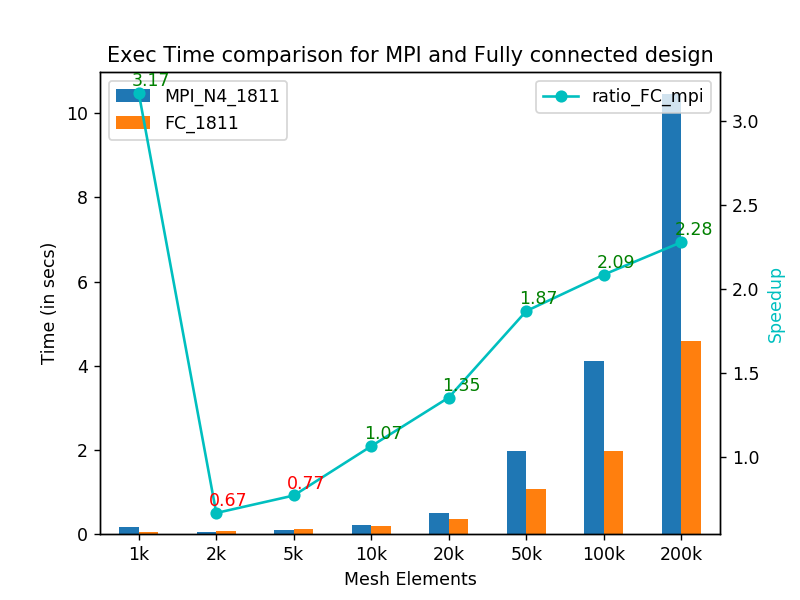

In [6]:
############################################
# MPI with 4 rings vs Fully connected
############################################
figk_fig, figk_ax  = plt.subplots()
data1[['elements', 'MPI_N4_1811', 'FC_1811']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax)
figk_ax2 = figk_ax.twinx()
data1[['elem','ratio_FC_mpi']].plot(x='elem', linestyle='-', marker='o', color='c', ax = figk_ax2)
# print(data1[['elem','per_opt_mpi']])
count = 0
for index, entry in data1[['elem','ratio_FC_mpi']].iterrows():
    
    if entry['ratio_FC_mpi'] > 1:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_FC_mpi']), xy=(count,entry['ratio_FC_mpi']), color='green',
                          textcoords='offset points', xytext=(-4,4))
    else:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_FC_mpi']), xy=(count, entry['ratio_FC_mpi']), color='red',
                          textcoords='offset points', xytext=(-4,4))
    count = count+1

figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Time (in secs)')
figk_ax2.set_ylabel('Speedup', color='c')
figk_ax.set_title("\n".join(wrap("Exec Time comparison for MPI and Fully connected design", 60)))

figk_ax.legend()
figk_ax2.legend()

<IPython.core.display.Javascript object>


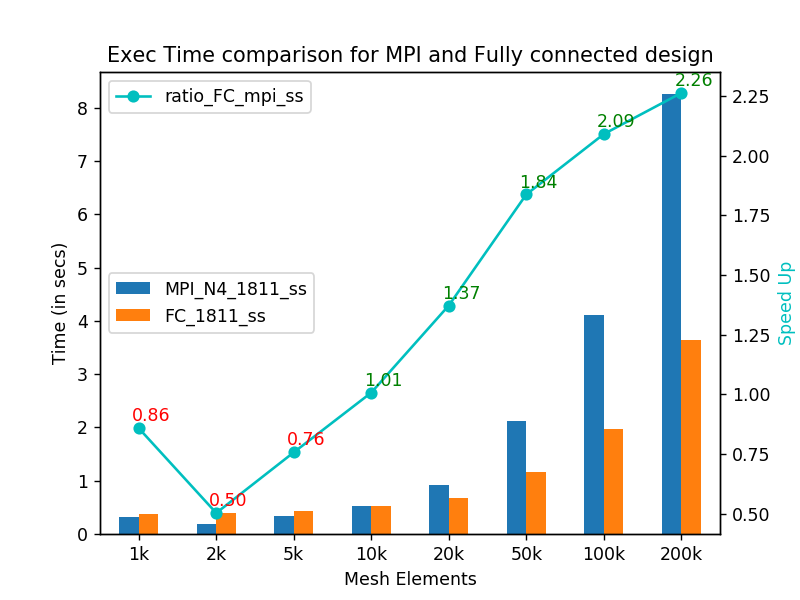

In [8]:
############################################
# MPI with 4 rings vs Fully connected Same steps
############################################
figk_fig, figk_ax  = plt.subplots()
data1[['elements', 'MPI_N4_1811_ss', 'FC_1811_ss']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax)
figk_ax2 = figk_ax.twinx()
data1[['elem','ratio_FC_mpi_ss']].plot(x='elem', linestyle='-', marker='o', color='c', ax = figk_ax2)
# print(data1[['elem','per_opt_mpi']])
count = 0
for index, entry in data1[['elem','ratio_FC_mpi_ss']].iterrows():
    
    if entry['ratio_FC_mpi_ss'] > 1:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_FC_mpi_ss']), xy=(count,entry['ratio_FC_mpi_ss']), color='green',
                          textcoords='offset points', xytext=(-4,4))
    else:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_FC_mpi_ss']), xy=(count, entry['ratio_FC_mpi_ss']), color='red',
                          textcoords='offset points', xytext=(-4,4))
    count = count+1

figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Time (in secs)')
figk_ax2.set_ylabel('Speed Up', color='c')
figk_ax.set_title("\n".join(wrap("Exec Time comparison for MPI and Fully connected design", 60)))

figk_ax.legend(loc=6)

<IPython.core.display.Javascript object>


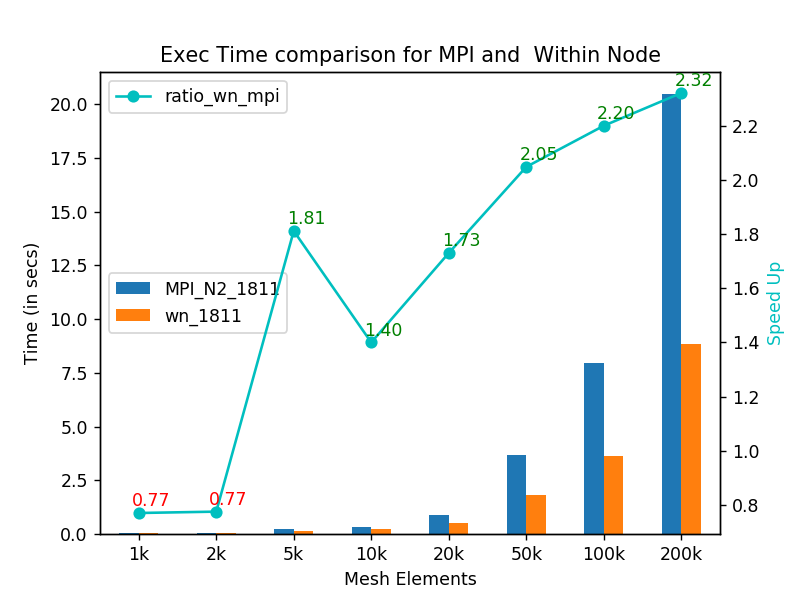

In [12]:
############################################
# MPI with 2 rings vs Within Node
############################################
figk_fig, figk_ax  = plt.subplots()
data1[['elements', 'MPI_N2_1811', 'wn_1811']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax)
figk_ax2 = figk_ax.twinx()
data1[['elem','ratio_wn_mpi']].plot(x='elem', linestyle='-', marker='o', color='c', ax = figk_ax2)
# print(data1[['elem','per_opt_mpi']])
count = 0
for index, entry in data1[['elem','ratio_wn_mpi']].iterrows():
    
    if entry['ratio_wn_mpi'] > 1:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_wn_mpi']), xy=(count,entry['ratio_wn_mpi']), color='green',
                          textcoords='offset points', xytext=(-4,4))
    else:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_wn_mpi']), xy=(count, entry['ratio_wn_mpi']), color='red',
                          textcoords='offset points', xytext=(-4,4))
    count = count+1

figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Time (in secs)')
figk_ax2.set_ylabel('Speed Up', color='c')
figk_ax.set_title("\n".join(wrap("Exec Time comparison for MPI and  Within Node", 60)))

figk_ax.legend(loc=6)

<IPython.core.display.Javascript object>


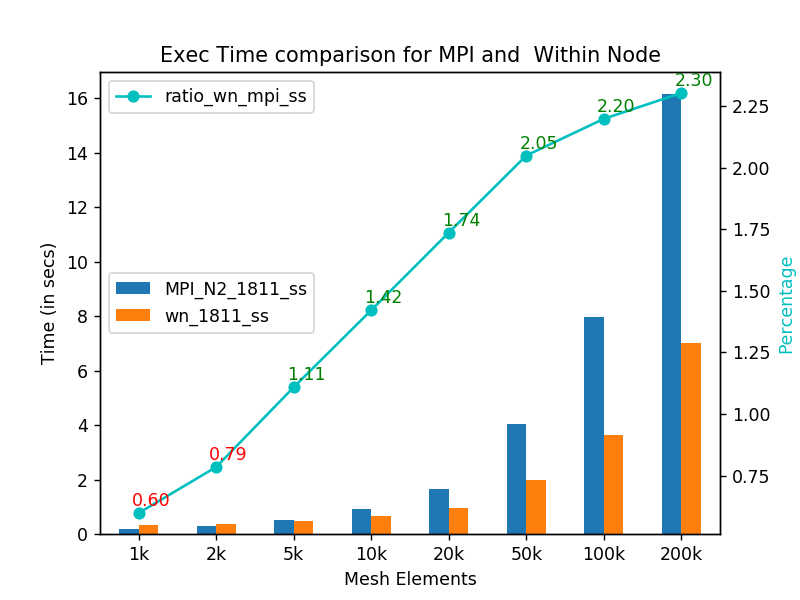

In [11]:
############################################
# MPI with 2 rings vs Within Node
############################################
figk_fig, figk_ax  = plt.subplots()
data1[['elements', 'MPI_N2_1811_ss', 'wn_1811_ss']].plot(x='elements', kind='bar', rot = 0, ax=figk_ax)
figk_ax2 = figk_ax.twinx()
data1[['elem','ratio_wn_mpi_ss']].plot(x='elem', linestyle='-', marker='o', color='c', ax = figk_ax2)
# print(data1[['elem','per_opt_mpi']])
count = 0
for index, entry in data1[['elem','ratio_wn_mpi_ss']].iterrows():
    
    if entry['ratio_wn_mpi_ss'] > 1:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_wn_mpi_ss']), xy=(count,entry['ratio_wn_mpi_ss']), color='green',
                          textcoords='offset points', xytext=(-4,4))
    else:
        figk_ax2.annotate("{:.2f}".format(entry['ratio_wn_mpi_ss']), xy=(count, entry['ratio_wn_mpi_ss']), color='red',
                          textcoords='offset points', xytext=(-4,4))
    count = count+1

figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Time (in secs)')
figk_ax2.set_ylabel('Percentage', color='c')
figk_ax.set_title("\n".join(wrap("Exec Time comparison for MPI and  Within Node", 60)))

figk_ax.legend(loc=6)

<IPython.core.display.Javascript object>


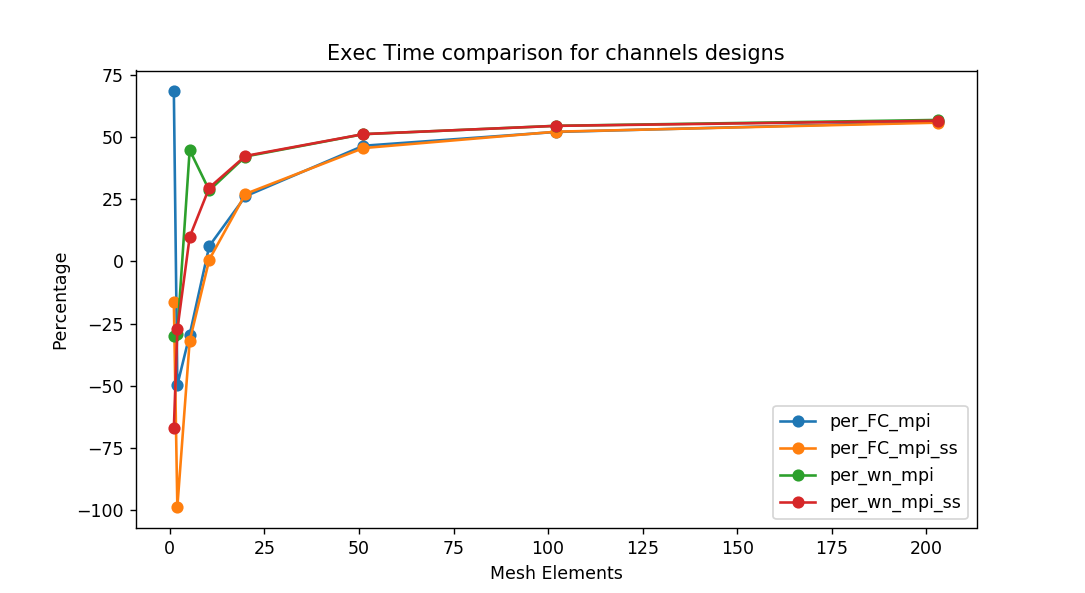

In [27]:
############################################
# All designs (tear-off)
############################################
figk_fig, figk_ax  = plt.subplots()
data1['elemek'] = data1['elements']/1000
data1[['elemek', 'per_FC_mpi','per_FC_mpi_ss', 'per_wn_mpi', 'per_wn_mpi_ss']].plot(x='elemek', rot = 0, ax=figk_ax, linestyle='-', marker='o')

# for index, entry in data1[['elemek','per_FC_mpi', 'per_WN_mpi']].iterrows():
    
#     if entry['per_FC_mpi'] > 0:
#         figk_ax.annotate("{:.2f}".format(entry['per_FC_mpi'])+"%", xy=(entry['elemek'],entry['per_FC_mpi']), color='green',
#                           textcoords='offset points', xytext=(-4,4))
#     else:
#         figk_ax.annotate("{:.2f}".format(entry['per_FC_mpi'])+"%", xy=(entry['elemek'], entry['per_FC_mpi']), color='red',
#                           textcoords='offset points', xytext=(-4,4))
    
#     if entry['per_WN_mpi'] > 0:
#         figk_ax.annotate("{:.2f}".format(entry['per_WN_mpi'])+"%", xy=(entry['elemek'],entry['per_WN_mpi']), color='green',
#                           textcoords='offset points', xytext=(-4,4))
#     else:
#         figk_ax.annotate("{:.2f}".format(entry['per_WN_mpi'])+"%", xy=(entry['elemek'], entry['per_WN_mpi']), color='red',
#                           textcoords='offset points', xytext=(-4,4))
#     count = count+1
figk_ax.set_xlabel('Mesh Elements')
figk_ax.set_ylabel('Percentage')
figk_ax.set_title("\n".join(wrap("Exec Time comparison for channels designs", 60)))

figk_ax.legend()